In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [30]:
versions = [0,1 ,2]
workers = [2,3,4,5,6,7,8,9]

times = []
for version in versions:
    for worker in workers:
        filepath = f"/home/francesco/Documenti/Master/Blok 3/HPPC/week3/data/task_farm.v{version}.{worker}.workers.txt"
        with open(filepath, 'r') as file:
            for line in file:
                if 'Elapsed time' in line:
                    elapsed_time = line.split(': ')[1].strip()[:-1]
                    times.append([version, worker, elapsed_time])
                    break

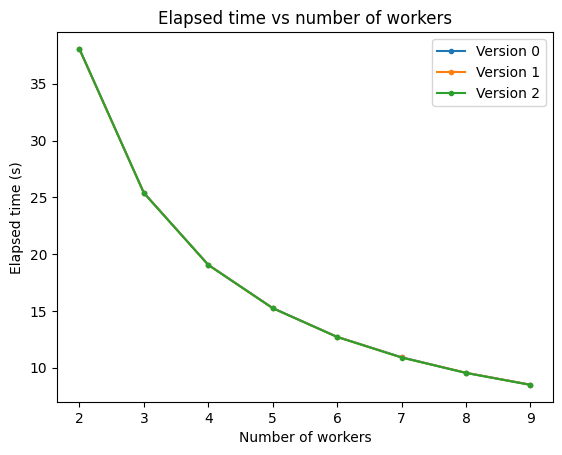

In [31]:
df = pd.DataFrame(times, columns=['version', 'workers', 'elapsed_time'])
df['elapsed_time'] = df['elapsed_time'].astype(float)
for version in df['version'].unique():
    df_version = df[df['version'] == version]
    plt.plot(df_version['workers'], df_version['elapsed_time'], marker='o', markersize = 3,  label=f'Version {version}')

plt.xlabel('Number of workers')
plt.ylabel('Elapsed time (s)')
plt.title('Elapsed time vs number of workers')
plt.legend()
plt.show()

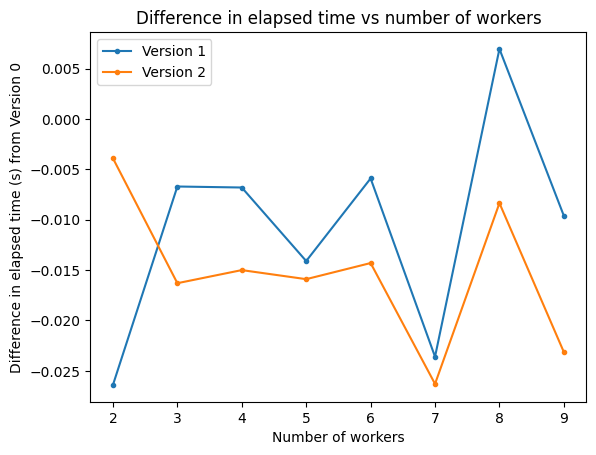

In [32]:
# Calcola la differenza rispetto alla versione 0
df_version_0 = df[df['version'] == 0].set_index('workers')['elapsed_time']
df['diff_from_v0'] = df.apply(lambda row: row['elapsed_time'] - df_version_0[row['workers']], axis=1)

# Plot della differenza rispetto alla versione 0
for version in df['version'].unique():
    if version != 0:
        df_version = df[df['version'] == version]
        plt.plot(df_version['workers'], df_version['diff_from_v0'], marker='o', markersize=3, label=f'Version {version}')

plt.xlabel('Number of workers')
plt.ylabel('Difference in elapsed time (s) from Version 0')
plt.title('Difference in elapsed time vs number of workers')
plt.legend()
plt.show()